In order to successfully complete this assignment you need to:
1. Participate both individually and in groups during class.
2. Submit this notebook to the `exercise` folder in your `cmse802-yourlastname` repository by 10pm __the SAME DAY of the class__. Late assignment will receive <=80% of the grade.

### <p style="text-align: left;"> &#9989; Rupita Tahsin

---

# __Linear algebra 2: Priciple Component Analysis__

<img alt="Gaussian scatter plot and PCA" width = 50% src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f5/GaussianScatterPCA.svg/1024px-GaussianScatterPCA.svg.png">

Image From: https://wikimedia.org

# Learning objectives

At the end of the exercise, you should be able to:
- Explain what the general idea of dimension reduction is.
- Define embedding.
- Conduct PCA analysis step by step.
- Conduct PCA analysis using Sckit-Learn

### Agenda for today's class (80 minutes)

1. [(20 minutes) Review Pre-class assignment](#preclass)
2. [(60 minutes) Everything else](#dimensions)


----
<a name="preclass"></a>

# 1. Pre-Class Assignment Review

In your group, discussion the following.

&#9989; <font color=red>**QUESTION:**</font> Did you get stuck doing pre-class exercise or find some ideas confusing? If so where did you get stuck? What did you find confusing? What solutions did your groupmates suggest?

<font size=+3>&#9998;</font> Replace with your answer to the above question!

No, did not get stuck with the pre-class it was easy to follow.

----

<a name="projection"></a>

# 2. Dimensionality reduction with principle component analysis

## 2.1 Get synthetic data



While there are [many choices for lower dimensional embedding methods](https://scikit-learn.org/stable/modules/unsupervised_reduction.html), here we will focus on PCA, which is arguably the most commonly used method. We'll do it the slow,manual way first, then we'll let `scikit-learn` do the heavy lifting for us. 


&#9989; **<font color=blue>DO THIS:</font>** First step is to build ourselves some synthetic data to play with, so poof! Here is some data in 3D to start working with. 


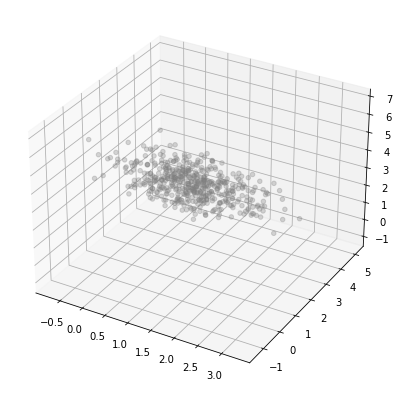

In [71]:
%matplotlib inline 

# Building a data set to reverse engineer 
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

np.random.seed(3)  # Get rid of this to make this actually random every time

def makeData(n = 500, mean = [1,2,3], cov = np.eye(3)):
    # returns an nx3 matrix of random data 
    x, y, z = np.random.multivariate_normal(mean, cov, 500).T
    return np.array([x,y,z])

# Create random covariance matrix, and then data 
A = 2*np.random.rand(3, 3)-1 # This just shifts the numbers to come from the interval [-1,1]
cov = np.dot(A, A.transpose())
P = makeData(n = 200, cov = cov)

# Creating figure in 3D
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(P[0,:],P[1,:],P[2,:], color = "gray", alpha=0.3)
plt.show()


In [72]:
P.shape

(3, 500)

In this form, we have the ability to visualize what's happening in 3d:
- But pretend this data was a standin for data in 8 dimensions..... or maybe 800 dimensions. 
- It's completely unreasonable to draw plots to try to guess what's up, and I don't know about you, but I can't visualize 8 dimensional space. 
- So, instead we look at projections of the data to lower dimensions.  
- __For the purposes of this example, "lower" will always be 2.__

## 2.2 Naive approaches for dimensionality redunction

&#9989; **<font color=blue>DO THIS:</font>** The first thing we can do is naievely project to just the first two coordinates. I could do that by just, well, plotting the first two dimensions: 

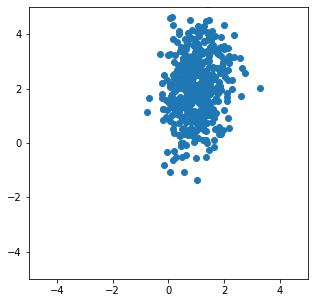

In [73]:
plt.figure(figsize=(5,5))
plt.scatter(P[0,:],P[1,:])
plt.xlim(-5, 5); plt.ylim(-5, 5); plt.show()

&#9989; **<font color=blue>DO THIS:</font>** Plot the second and the third dimensions in 2D based on the 2nd and the 3rd coordinate vectors in $P$: 

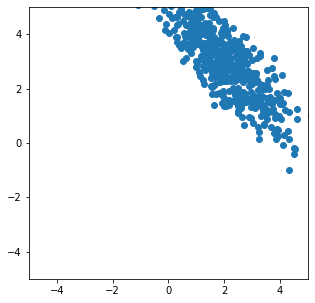

In [74]:
# put your code here

plt.figure(figsize=(5,5))
plt.scatter(P[1,:],P[2,:])
plt.xlim(-5, 5); plt.ylim(-5, 5); plt.show()


&#9989; **<font color=blue>DO THIS:</font>** I could also do this by multiplying by a matrix as such. This allows us to __project__ a 3D dataset into a 2D space. This matrix is a __transformation matrix__.

In the following example, a matrix $A$ of size (2x3) is multiplied (with Numpy matrix multiply operator `@`) with matrix $P$ which has a size of (3x500). Before running the next cell, figure out what the size of the resulted matrix.

As per matrix multiplication rule the resulting matrix should be a 2X500 size matrix

In [75]:
A = np.array([[-1,0,0],[0,1,0]])
print('A=\n',A)
Q = A@P  # @ is the matrix multiplication operator
print(Q.shape)

A=
 [[-1  0  0]
 [ 0  1  0]]
(2, 500)


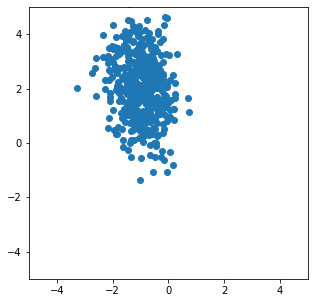

In [76]:
plt.figure(figsize=(5,5))
plt.scatter(Q[0,:],Q[1,:])
plt.xlim(-5, 5); plt.ylim(-5, 5); plt.show()

Compare the plot based on the product of $A$ and $P$ to the plot based on the 1st two dimension, notice anythning interesting?

Turn out that this is a reflection of the 1st two dimensions of $P$ on the new y-axis.

&#9989; **<font color=blue>DO THIS:</font>** We can look at more ways to project $P$ into 2 dimensions.  Some of these projections will be more useful than others. Here "useful" means that it will help us better represent $P$ at a lower dimension. More on this later. For now, let's look at a few examples of transformation matrix $A$.

In [77]:
A1 = np.random.random((2,3))
A2 = np.random.random((2,3))
A3 = np.random.random((2,3))
A4 = np.random.random((2,3))
A1, A2, A3, A4

(array([[0.35515042, 0.27139511, 0.83674686],
        [0.97959273, 0.34762106, 0.92719537]]),
 array([[0.18876863, 0.40131096, 0.3596912 ],
        [0.61633297, 0.35468669, 0.25158704]]),
 array([[0.6479993 , 0.46889151, 0.69820916],
        [0.5451111 , 0.40649216, 0.50176651]]),
 array([[0.82633328, 0.72548678, 0.33631978],
        [0.48416519, 0.03122497, 0.88352948]]))

Text(0.5, 1.0, 'A4')

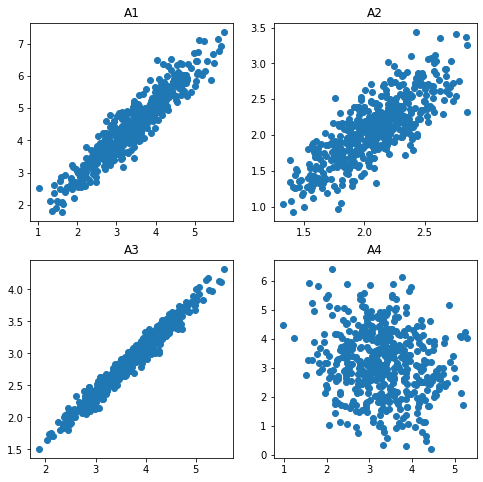

In [78]:
Q1 = A1@P; Q2 = A2@P; Q3 = A3@P; Q4 = A4@P
fig, axs = plt.subplots(2, 2, figsize=(8,8))
axs[0,0].scatter(Q1[0,:],Q1[1,:])
axs[0,0].set_title('A1')
axs[0,1].scatter(Q2[0,:],Q2[1,:])
axs[0,1].set_title('A2')
axs[1,0].scatter(Q3[0,:],Q3[1,:])
axs[1,0].set_title('A3')
axs[1,1].scatter(Q4[0,:],Q4[1,:])
axs[1,1].set_title('A4')

- The important bit is that all of these projections take every point (a row in the original $P$ matrix) and draw it somewhere in the lower dimensions (the corresponding row in the $Q$ matrix). 
- In the case that we have 800 dimensional data, my next goal will be to __automatically find a "good" choice of matrix $A$ to project down the data__ in a way that I can still see how it relates to the each other point, but now in 3D where I can actually see it. 

## 2.3 PCA in steps

With all that in mind, here are the basic steps to finding a nice matrix $A$ to use to project our data. 


### Step 1: Subtract the mean

This is often called "mean centering", and is necessary for making PCA work properly. 

&#9989; **<font color=blue>DO THIS:</font>** Write code to calculate $P_c$, where:

- each row of $P$ is replaced with values of that row minus the mean of the row. 

In [79]:
# Your code here

P_c=np.zeros((3,500))
print(np.shape(P_c))
for i in range(0,500):
    P_c[0,i]=P[0,i]-(np.mean(P[0]))
    P_c[1,i]=P[1,i]-np.mean(P[1])
    P_c[2,i]=P[2,i]-np.mean(P[2])
    
print(P_c)

(3, 500)
[[-0.27430354 -0.32494807  0.24156947 ... -0.03745724  1.22404334
  -0.24002702]
 [ 0.28777522 -1.21613585 -0.98157367 ... -0.10734575  1.11490512
  -0.74426715]
 [ 1.23491134  0.29741235 -0.06280701 ...  0.67083006 -0.46017381
   0.08451992]]


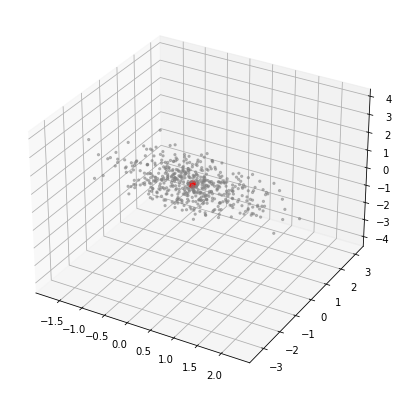

In [80]:
# Creating figure in 3D
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(P_c[0,:],P_c[1,:],P_c[2,:], s=5, color = "grey", zorder=1, alpha=0.5)

# color the center: (0,0,0)
ax.scatter3D(0, 0, 0, s=50, color = "red", zorder=2)

### Step 2: Calculate the covariance matrix of the data.  

Ok, so I know we can just go look up above to see what covariance matrix we used to generate the data in the first place, so the game instead is to calculate it directly from your data. 

&#9989; **<font color=blue>DO THIS:</font>** Use the `np.cov` function to calculate the covariance matrix of your data and print it out.  Because our data is in 3 dimensions, this should be a 3x3 matrix. 


In [81]:
# Your code here
COV=np.cov(P_c)
print(COV)


[[ 0.33625985  0.10897442 -0.08596898]
 [ 0.10897442  1.23457853 -1.19244881]
 [-0.08596898 -1.19244881  1.73759433]]


### Step 3: Calculate the eigenvectors of the covariance matrix 


&#9989; **<font color=blue>DO THIS:</font>** Use the `np.linalg.eig` function to calculate the eigenvalues and eigenvectors of the covariance matrix. Print them out.

In [82]:
# Your code here 
eig_vec=np.linalg.eig(COV)[1]
eig_val=np.linalg.eig(COV)[0]
print("The eigen vectors are",eig_vec)
print("The eigen values are",eig_val)



The eigen vectors are [[-0.05690378 -0.92280321 -0.38104619]
 [-0.62945997 -0.26308874  0.73113915]
 [ 0.77494652 -0.28145791  0.56589694]]
The eigen values are [2.71248839 0.34110735 0.25483696]


The three eigenvectors are (with 3 significant digits):

$$
\left( {\begin{array}{cc} -0.057 \\ -0.629 \\ 0.775 \end{array} } \right), 
\left( {\begin{array}{cc} -0.923 \\ -0.263 \\ -0.281 \end{array} } \right), \text{and }
\left( {\begin{array}{cc} -0.381 \\ -0.731 \\ 0.566 \end{array} } \right) 
$$

The corresponding eigenvalues are $2.712$, $0.341$, and $0.255$, respectively.

&#9989; **<font color=blue>DO THIS:</font>** An eigenvector is a unit vector, that is, the length of the vector is 1. Recall that for a vector $v = (a, b, c)$, its length is:

$$\Vert v\Vert = \sqrt{a^2+b^2+c^2}$$

Write code that determine the length of the 1st eigenvector.

In [84]:
# Your code here

length_1= np.sqrt((eig_vec[0,0])**2+(eig_vec[1,0])**2+(eig_vec[2,0])**2)
print(length_1)

1.0


&#9989; **<font color=blue>DO THIS:</font>** An eigenvector $x$ is a vector that satisfies:

$$Ax = \lambda x$$

Where:
- $A$ is the covariance matrix.
- $\lambda$ is the eigenvalue for the eigenvector in equestion.

Check that the output vectors satisfy the above eigenvalue property by computing $Ax$ and $\lambda x$ of the 1st eigenvector. 

In [109]:
# Your code here
#A_x=np.matrix(COV)@eig_vec
x=np.matrix((eig_vec[0,0],eig_vec[1,0],eig_vec[2,0])).T #Seperating first eigen vector from whole vector array
A_x=np.matrix(COV)@x
print("First eigen vector",x)

Lambda_x=(eig_val[0])*x   #matrix multiplier operator @ is not required as the eigen value is a scalar

print("The values are Ax is",A_x)
print("And lambda x is ", Lambda_x)


First eigen vector [[-0.05690378]
 [-0.62945997]
 [ 0.77494652]]
The values are Ax is [[-0.15435085]
 [-1.70740287]
 [ 2.10203343]]
And lambda x is  [[-0.15435085]
 [-1.70740287]
 [ 2.10203343]]


So the results are matching meaning the calculation was correct!

&#9989; **<font color=blue>DO THIS:</font>** Assuming you saved your eigenvector matrix as eigVecs and centered data as P_c, the following plot will show you where the eigen vectors are pointing.

Note that the eigenvector length is multiplied by its corresponding eigenvector value to show how different they are.

In [112]:
eigVecs=eig_vec
eigVals=eig_val

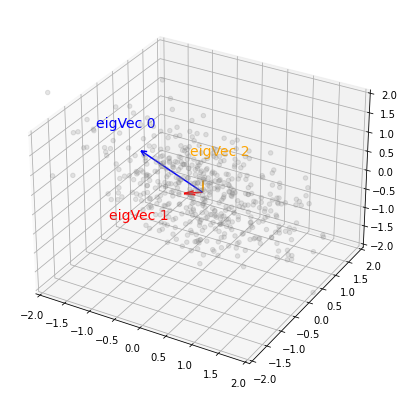

In [113]:
# Creating figure in 3D
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(P_c[0,:],P_c[1,:],P_c[2,:], 
             color = "gray", alpha=0.2)

colors = ['blue','red','orange']            # for the three eigVecs
offsets = [[-1,-1,1.5], [-0.5,-0.5,-0.5],[0,-0.5,0.1]] # for plotting texts
for i in range(3):
    # plot arrow
    ax.quiver(0, 0, 0, 
          eigVals[i]*eigVecs[0,i], 
          eigVals[i]*eigVecs[1,i], 
          eigVals[i]*eigVecs[2,i], color=colors[i],
          arrow_length_ratio=0.2/eigVals[i])

    # Add text
    ax.text(eigVecs[:,i][0] + offsets[i][0], 
            eigVecs[:,i][1] + offsets[i][1],
            eigVecs[:,i][2] + offsets[i][2],  
            f'eigVec {i}',fontsize=14, color=colors[i])

ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
ax.set_zlim(-2,2)
plt.show()

### Step 4. Choose components and forming a feature vector

Ok, so what is going on here is that the eigenvector associated to the largest eigenvalue (note the code hands them to you in decreasing order of eigenvalue, see (below) is the *principle component* of the data. In our case, the blue eigenvector is pointing down the middle of the data set (assuming you got a long oblong data set). 

In [115]:
eigVals

array([2.71248839, 0.34110735, 0.25483696])

In general, you would use the first $n$ eigenvectors to build an embedding in $n$ dimensions from your high dimensional data set. Here, embedding is defined as a representation of the original data (e.g., 3D) at a lower dimenson (e.g., 2D). This is where the notion of data compression and reduced dimensionality comes in:

To get the embedding, we first need to define a __feature vector__ that is the matrix formed by the $𝑛$ eigenvectors we are keeping.

&#9989; **<font color=blue>DO THIS:</font>**  Define the feature vector as `feat_vec` with the first two eigenvectors. Print out the feature vector.

In [213]:
# put your code here
feat_vec = np.array([eigVecs[:,0], eigVecs[:,1]] ).T


### Step 5. Derive the new dataset with lower dimensionality

The new dataset with reduced dimensionality can be obtained by: 

$$
\text{NewData} = \text{FeatureVector}^T \times \text{RowDataMeanCentered}
$$
So, we need to take the transpose of the feature vector and multiply it on the left of the mean-centered data set $P_c$. 


&#9989; **<font color=blue>DO THIS:</font>** Write code to figure out the dimensions of the feature vector and the mean centered dataset.

In [214]:
# your code here
print(np.shape(feat_vec))
print(np.shape(P_c))

(3, 2)
(3, 500)


&#9989; **<font color=blue>DO THIS:</font>** Based on the step 5 formula above:

- Get `new_data` with reduced dimensionality,
- Print out the size of `new_data`,
- Plot `new_data` in 2D.

In [215]:
# put your code here
new_data=(feat_vec.T)@P_c
print(np.shape(new_data))



(2, 500)


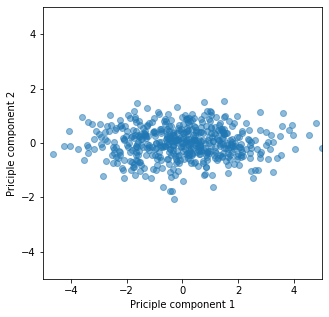

In [216]:
# Plot the new data
plt.figure(figsize=(5,5))
plt.scatter(new_data[0,:],new_data[1,:], alpha=0.5)
plt.xlabel("Priciple component 1")
plt.ylabel("Priciple component 2")
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.show()

__RECAP:__ So what's the point? At the end of all this, we have transformed each of our data points into a data point in 2 dimensions, with everything as spread out as possible by using the eigenvectors. 

### Step 6. Explained variance

The last useful part of PCA is the *explained variance* of each eigenvector. Specifically, the *total variance* is the sum of variance of all individual principal components. You can figure this out by adding up the diagonal values of the covariance matrix.

&#9989; **<font color=blue>DO THIS:</font>** Compute:
- The sum of the diagonal elements of the computed covariance matrix (also known as the trace and can be calculated with Numpy `trace` function).
- It turns out that this total variance is the same as the sum of the eigenvalues computed. Sum the eigenvalues to see if it is the case.
- Print out both values. 

In [217]:
# Your code here
np.trace(COV)


3.3084327081159532

In [218]:
sumEig=np.sum(eigVals)
print(sumEig)

3.308432708115955


&#9989; **<font color=blue>DO THIS:</font>** The __variance explained__ by each eigenvalue is the eigenvalue divided by the total value. Compute the explained variance for each of the three eigenvectors

In [219]:
# Your code here 
print("Variance explained for first eigen value", eigVals[0]/sumEig)
print("Variance explained for second eigen value", eigVals[1]/sumEig)
print("Variance explained for third eigen value", eigVals[2]/sumEig)

Variance explained for first eigen value 0.8198711081362653
Variance explained for second eigen value 0.10310240075951656
Variance explained for third eigen value 0.07702649110421811


&#9989; **<font color=blue>DO THIS:</font>** Saying that the first $k$ eigenvalues explain $x\%$ of the variance means that if you sum up the explained variance for each of the eigenvalues you're using, you get $x\%$. 

Calculate the variance explained by the first two eigenvectors (the ones we're using).

In [220]:
# Your code here 
((eigVals[0]+eigVals[1])/sumEig)


0.9229735088957819

Reasonable % for representation

__RECAP:__ The basic idea for interpretation is that if you have a high percentage explained by the eigenvectors used, this is a reasonable representation of the data.  This information can also tell you how many dimensions you need..... not enough, and you're not explaining enough of the variance with the projection used. 

## 2.4 PCA the fast way

Ok, so now that we've done it the painful way, we can let `scikit-learn` do the work for us. 

### Step 1: Get data

Here is everyone's favorite PCA explanation data set, Iris:

&#9989; **<font color=blue>DO THIS:</font>** Run the following cell to read the iris dataset into a Pandas DataFrame.

In [221]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
df.head()

sepal length  sepal width  petal length  petal width       target
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

&#9989; **<font color=blue>DO THIS:</font>** This data set consists of measurements of three different types of iris, with the type of iris stored in the `target` column. In this case, we have 4 dimensional data, so to look at it, let's choose 3 of the dimensions to see at a time. 

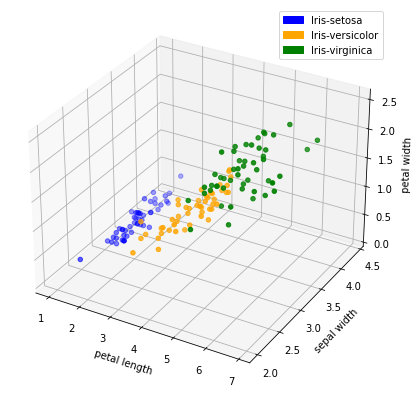

In [222]:
# Creating figure in 3D
import matplotlib.patches as mpatches

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

# This code makes it so that each point is colored by the label
colormap = {'Iris-setosa':'blue',
            'Iris-versicolor':'orange',
            'Iris-virginica':'green'}
colorByLabel = [colormap[i] for i in df['target']]

scatter = ax.scatter3D(df['petal length'], df['sepal width'], df['petal width'], 
             color = colorByLabel)
ax.set_xlabel('petal length')
ax.set_ylabel('sepal width')
ax.set_zlabel('petal width')

# For showing legend
sp = list(colormap.keys()) # species
handles = [mpatches.Patch(color=colormap[sp[0]], label=sp[0]),
           mpatches.Patch(color=colormap[sp[1]], label=sp[1]),
           mpatches.Patch(color=colormap[sp[2]], label=sp[2])]
ax.legend(handles=handles)
plt.show()


### Step 2. Get new data with reduced dimensionality

&#9989; **<font color=blue>DO THIS:</font>** To get the new data with reduced dimensionality ($n=2$):
- Store the variable values in a DataFrame called `X`.
- Call the `PCA` function from Scikit-Learn, a machine learning toolkit.

In [186]:
X = df.iloc[:,:-1] # Get all rows, all columns except the last one
X.head()

sepal length  sepal width  petal length  petal width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2

In [187]:
from sklearn.decomposition import PCA
pca2 = PCA(n_components=2)
Q2 = pca2.fit_transform(X)

Text(0, 0.5, 'Priciple component 2')

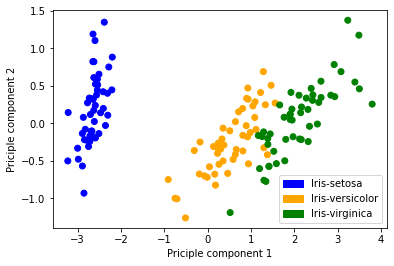

In [188]:
plt.scatter(Q2[:,0],Q2[:,1], color = colorByLabel)
plt.legend(handles=handles)
plt.xlabel("Priciple component 1")
plt.ylabel("Priciple component 2")


&#9989; **<font color=blue>DO THIS:</font>** Does two dimensions seem reasonable for representing our data? Use the code block below to determine how much variance is explained by the 1st two principle components.

[Hint]: Find out what you need to use to find out the variance explained with `help(pca)`.

In [193]:
# Your code here 
help(PCA)



Help on class PCA in module sklearn.decomposition._pca:

class PCA(sklearn.decomposition._base._BasePCA)
 |  PCA(n_components=None, *, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', random_state=None)
 |  
 |  Principal component analysis (PCA).
 |  
 |  Linear dimensionality reduction using Singular Value Decomposition of the
 |  data to project it to a lower dimensional space. The input data is centered
 |  but not scaled for each feature before applying the SVD.
 |  
 |  It uses the LAPACK implementation of the full SVD or a randomized truncated
 |  SVD by the method of Halko et al. 2009, depending on the shape of the input
 |  data and the number of components to extract.
 |  
 |  It can also use the scipy.sparse.linalg ARPACK implementation of the
 |  truncated SVD.
 |  
 |  Notice that this class does not support sparse input. See
 |  :class:`TruncatedSVD` for an alternative with sparse data.
 |  
 |  Read more in the :ref:`User Guide <PCA>`.
 |  
 | 

In [198]:
print(pca2.explained_variance_ratio_)

[0.92461621 0.05301557]



&#9989; **<font color=blue>DO THIS:</font>** Rerun PCA with $n=3$. Determine the variance explained by the three principle components.

In [204]:
# Your code here 
pca3 = PCA(n_components=3)
Q3 = pca3.fit_transform(X)

print(pca3.explained_variance_ratio_)



[0.92461621 0.05301557 0.01718514]


-----
### Congratulations, we're done!

Michigan State University with modifications
<a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.